In [1]:
# import libraries
import pandas as pd
import re
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ejiro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# read in your data
data = r"C:\Users\ejiro\Downloads\McDonald_s_Reviews.csv\McDonald_s_Reviews.csv"
df = pd.read_csv(data, encoding='unicode_escape')
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [6]:
# create a new dataframe using only the needed columns
rev = df[["review", "review_time", "rating"]].copy()
rev.head()

,review,review_time,rating
0,Why does it look like someone spit on my food?...,3 months ago,1 star
1,It'd McDonalds. It is what it is as far as the...,5 days ago,4 stars
2,Made a mobile order got to the speaker and che...,5 days ago,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,a month ago,5 stars
4,"I repeat my order 3 times in the drive thru, a...",2 months ago,1 star


In [17]:
# create a function to identify and remove special characters
def special_char(text):
    # Convert to string to handle potential non-string data types
    text = str(text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s\'.]', '', text)
    return cleaned_text
# Apply the function to the 'review' column and create a new column 'cleaned_review'
rev['cleaned_review'] = rev['review'].apply(special_char)
rev[["review", "cleaned_review"]].head(15)

,review,cleaned_review
0,Why does it look like someone spit on my food?...,Why does it look like someone spit on my food\...
1,It'd McDonalds. It is what it is as far as the...,It'd McDonalds. It is what it is as far as the...
2,Made a mobile order got to the speaker and che...,Made a mobile order got to the speaker and che...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,My mc. Crispy chicken sandwich was customer s...
4,"I repeat my order 3 times in the drive thru, a...",I repeat my order 3 times in the drive thru an...
5,I work for door dash and they locked us all ou...,I work for door dash and they locked us all ou...
6,If I could give this location a zero on custo...,If I could give this location a zero on custo...
7,Came in and ordered a Large coffee w/no ice. T...,Came in and ordered a Large coffee wno ice. Th...
8,Went thru drive thru. Ordered. Getting home no...,Went thru drive thru. Ordered. Getting home no...
9,"I'm not really a huge fan of fast food, but I ...",I'm not really a huge fan of fast food but I h...


In [18]:
# now drop the review column
del rev["review"]

In [20]:
rev["rating"]

0         1 star
1        4 stars
2         1 star
3        5 stars
4         1 star
          ...   
33391     1 star
33392    5 stars
33393    4 stars
33394    5 stars
33395    5 stars
Name: rating, Length: 33396, dtype: object

In [22]:
rev["numeric_rating"] = rev['rating'].str.extract('(\d+)').astype(float)
rev["numeric_rating"]

0        1.0
1        4.0
2        1.0
3        5.0
4        1.0
        ... 
33391    1.0
33392    5.0
33393    4.0
33394    5.0
33395    5.0
Name: numeric_rating, Length: 33396, dtype: float64

In [24]:
# remove the rating column
del rev["rating"]

In [26]:
rev["review_time"]

0        3 months ago
1          5 days ago
2          5 days ago
3         a month ago
4        2 months ago
             ...     
33391     4 years ago
33392      a year ago
33393      a year ago
33394     5 years ago
33395     2 years ago
Name: review_time, Length: 33396, dtype: object

In [47]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

# Function to convert time periods to datetime objects
def convert_to_datetime(period):
    if 'year' in period:
        if period.split()[0].isdigit():
            num_years = int(period.split()[0])
            return datetime.now() - relativedelta(years=num_years)
    elif 'month' in period:
        if period.split()[0].isdigit():
            num_months = int(period.split()[0])
            return datetime.now() - relativedelta(months=num_months)
    elif 'week' in period:
        if period.split()[0].isdigit():
            num_weeks = int(period.split()[0])
            return datetime.now() - relativedelta(weeks=num_weeks)
    elif 'day' in period:
        if period.split()[0].isdigit():
            num_days = int(period.split()[0])
            return datetime.now() - relativedelta(days=num_days)
    return None  # Return None for unmatched patterns

# Apply the function to the 'review_time' column and create a new 'modified_review_time' column with only the dates
rev['modified_review_time'] = rev['review_time'].apply(lambda x: convert_to_datetime(x).date() if convert_to_datetime(x) else "Unknown Date")
rev[["review_time", "modified_review_time"]]

,review_time,modified_review_time
0,3 months ago,2023-08-15
1,5 days ago,2023-11-10
2,5 days ago,2023-11-10
3,a month ago,Unknown Date
4,2 months ago,2023-09-15
...,...,...
33391,4 years ago,2019-11-15
33392,a year ago,Unknown Date
33393,a year ago,Unknown Date
33394,5 years ago,2018-11-15


In [163]:
# convert the new review_time column and Group the dates by year and count occurrences

import numpy as np
rev['modified_review_time'] = pd.to_datetime(rev['modified_review_time'], errors='coerce')

# Filter out non-finite values (NaN or inf) before grouping by year
valid_dates = rev['modified_review_time'][np.isfinite(rev['modified_review_time'].dt.year)]
# Grouping by year, counting occurrences, and converting to integers
grouped_dates = valid_dates.dt.year.astype(int).value_counts()



In [162]:
print(grouped_dates)

2019    6740
2020    5522
2023    4767
2018    4306
2021    3892
2017    1679
2022     457
2016     387
2015      91
2014      52
2013      38
2012      10
2011       4
Name: modified_review_time, dtype: int64


In [53]:
rev.isnull().sum()

review_time                0
cleaned_review             0
numeric_rating             0
modified_review_time    5451
dtype: int64

In [55]:
rev.shape

(33396, 4)

In [81]:
# extract a random review
random_rev = rev["cleaned_review"][100]
random_rev

"I love going to McDonald's in that area because that's where I get most of my food for my family and my grandchildren and they love me when I bring stuff to him like every couple days so it's great to go to that McDonald's McDonald's is a good spot for taking my grandkids and buy him food there are the greatest thing that they're right off of lake Creek thank you for putting it there"

In [83]:
# apply vader
analyzer=SentimentIntensityAnalyzer()
analyzer.polarity_scores(random_rev)

# In the resultant dictionary,
# * Pos: Positive Review Degree
# Neg: Negative Review Degree
# * Neu: Neutral Review Degree
# * Compound: It ranges from -1(very negative) to +1(very positive).

{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9773}

In [137]:
rev

,review_time,cleaned_review,numeric_rating,modified_review_time,Negative,Neutral,Positive,Compound
0,3 months ago,Why does it look like someone spit on my food\...,1.0,2023-08-15,0.027,0.877,0.096,0.5215
1,5 days ago,It'd McDonalds. It is what it is as far as the...,4.0,2023-11-10,0.000,0.791,0.209,0.8687
2,5 days ago,Made a mobile order got to the speaker and che...,1.0,2023-11-10,0.051,0.949,0.000,-0.3535
3,a month ago,My mc. Crispy chicken sandwich was customer s...,5.0,NaT,0.000,1.000,0.000,0.0000
4,2 months ago,I repeat my order 3 times in the drive thru an...,1.0,2023-09-15,0.143,0.857,0.000,-0.8020
...,...,...,...,...,...,...,...,...
33391,4 years ago,They treated me very badly.,1.0,2019-11-15,0.459,0.541,0.000,-0.5256
33392,a year ago,The service is very good,5.0,NaT,0.000,0.556,0.444,0.4927
33393,a year ago,To remove hunger is enough,4.0,NaT,0.333,0.667,0.000,-0.2500
33394,5 years ago,It's good but lately it has become very expens...,5.0,2018-11-15,0.000,0.804,0.196,0.2382


In [146]:
# apply VADER to all reviews

analyzer = SentimentIntensityAnalyzer()

body = rev.cleaned_review
neg, neu, pos, compound, tag = [], [], [], [], []

for review in body:
    res = analyzer.polarity_scores(str(review))
    neg.append(res['neg'])
    neu.append(res['neu'])
    pos.append(res['pos'])
    compound.append(res['compound'])

    # Assigning sentiment tags based on VADER scores for each review
    if res['compound'] >= 0.05:
        tag.append("Positive")
    elif res['compound'] <= -0.05:
        tag.append("Negative")
    else:
        tag.append("Neutral")

# Append results to the dataframe
rev["Negative"] = neg
rev["Neutral"] = neu
rev["Positive"] = pos
rev["Compound"] = compound
rev["Sentiment_Tag"] = tag


In [153]:
rev.tail(10)


,cleaned_review,numeric_rating,modified_review_time,Negative,Neutral,Positive,Compound,Sentiment_Tag
33386,Great in fast food,5.0,NaT,0.000,0.423,0.577,0.6249,Positive
33387,Excellent location and very good atmosphere ex...,5.0,2017-11-15,0.000,0.315,0.685,0.8969,Positive
33388,All very good food attention,5.0,2020-11-15,0.000,0.556,0.444,0.4927,Positive
33389,Quiet open the local January 1.,4.0,2018-11-15,0.000,1.000,0.000,0.0000,Neutral
33390,Very. Well,5.0,NaT,0.000,0.295,0.705,0.3384,Positive
33391,They treated me very badly.,1.0,2019-11-15,0.459,0.541,0.000,-0.5256,Negative
33392,The service is very good,5.0,NaT,0.000,0.556,0.444,0.4927,Positive
33393,To remove hunger is enough,4.0,NaT,0.333,0.667,0.000,-0.2500,Negative
33394,It's good but lately it has become very expens...,5.0,2018-11-15,0.000,0.804,0.196,0.2382,Positive
33395,they took good care of me,5.0,2021-11-15,0.000,0.396,0.604,0.7269,Positive


In [177]:
rev["Sentiment_Tag"].value_counts()

Positive    17414
Negative     9608
Neutral      6374
Name: Sentiment_Tag, dtype: int64

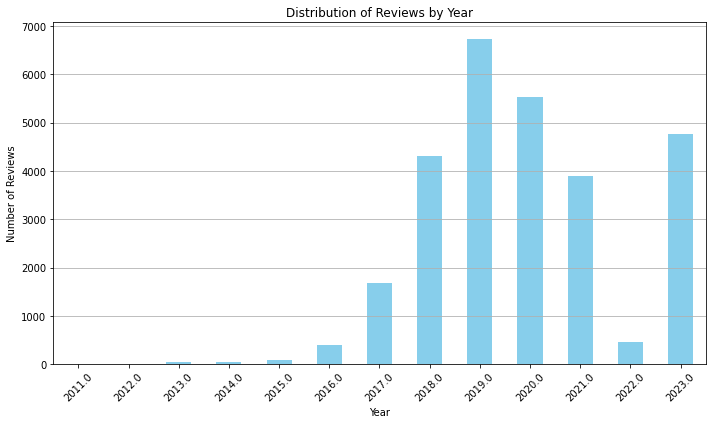

In [176]:
# visualize reviews by year
rev['Year'] = rev['modified_review_time'].dt.year

# Group by year and count occurrences
yearly_distribution = rev['Year'].value_counts().sort_index()

# Visualization - Bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
yearly_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


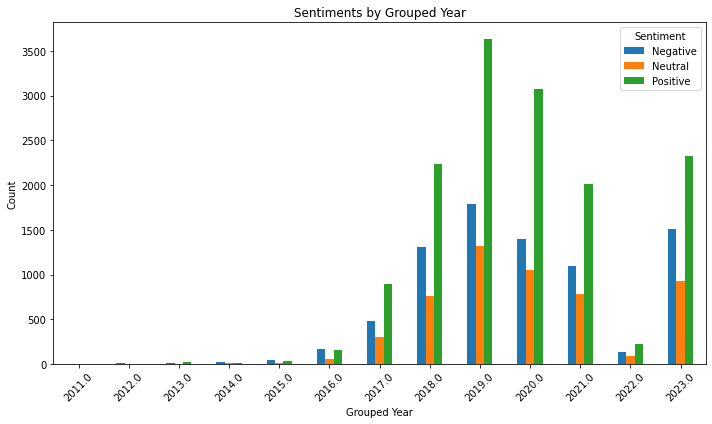

In [179]:
# visualize sentiments by year
sentiments_by_year = rev.groupby(['Year', 'Sentiment_Tag']).size().unstack()

# Plotting sentiments by grouped year
sentiments_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiments by Grouped Year')
plt.xlabel('Grouped Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
